In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
THRESHOLDS = [4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]

In [12]:
data = [] * len(THRESHOLDS)
for idx, threshold in enumerate(THRESHOLDS):
#     print (idx, threshold)
    data.append(pd.read_csv("Dataframes/result_" + str(threshold) + ".csv"))

In [13]:
results = pd.concat(data).reset_index()


In [14]:
# results = pd.read_csv("Metric_threshold_dependency_8_launches.csv")
baseline = pd.read_csv("Quality_checks/good_baseline.csv")

In [15]:
baseline

,index,Unnamed: 0,F1 (0.5),F1 (0.5)_base,avg_prec,avg_prec_base,ext_F1 (0.5),ext_F1 (0.5)_base,ext_avg_prec,ext_avg_prec_base,...,ext_roc_auc_base,portion,portion_base,prec_rec_auc,prec_rec_auc_base,roc_auc,roc_auc_base,threshold,weight,weight_base
0,4,4,0.004266,0.0,0.005125,0.004710,0.223143,0.0,0.243163,0.166300,...,0.901960,0.000303,0.000303,0.005122,0.004672,0.929893,0.948589,4.5,3301.247928,3301.247928
1,5,5,0.001061,0.0,0.001432,0.001128,0.074309,0.0,0.094575,0.059438,...,0.903593,0.000110,0.000110,0.001430,0.001084,0.918044,0.943966,5.0,9084.009917,9084.009917
2,6,0,0.000699,0.0,0.000831,0.000513,0.049062,0.0,0.047940,0.032878,...,0.917612,0.000060,0.000060,0.000828,0.000483,0.855239,0.938369,5.3,16742.774976,16742.774976
3,7,1,0.000302,0.0,0.000576,0.000476,0.022818,0.0,0.033554,0.030376,...,0.916138,0.000049,0.000049,0.000573,0.000444,0.893792,0.936182,5.4,20209.600247,20209.600247
4,9,6,0.000394,0.0,0.000572,0.000397,0.030514,0.0,0.034534,0.020439,...,0.910503,0.000042,0.000042,0.000569,0.000363,0.898686,0.939539,5.5,23998.661323,23998.661323
5,10,3,0.000169,0.0,0.000267,0.000282,0.014843,0.0,0.024417,0.018097,...,0.913131,0.000034,0.000034,0.000265,0.000245,0.909489,0.936926,5.6,29323.312781,29323.312781
6,11,4,0.000131,0.0,0.000242,0.000227,0.012255,0.0,0.019642,0.014159,...,0.902916,0.000028,0.000028,0.000242,0.000186,0.856406,0.929650,5.7,35705.519569,35705.519569
7,12,5,0.000120,0.0,0.000190,0.000236,0.011844,0.0,0.014567,0.013028,...,0.930513,0.000023,0.000023,0.000187,0.000187,0.799658,0.944433,5.8,43048.395037,43048.395037
8,13,6,0.000090,0.0,0.000180,0.000249,0.008030,0.0,0.011013,0.009683,...,0.925002,0.000018,0.000018,0.000177,0.000187,0.874629,0.945244,5.9,55604.467921,55604.467921
9,15,7,0.000076,0.0,0.000068,0.000219,0.006478,0.0,0.004432,0.007160,...,0.937934,0.000014,0.000014,0.000065,0.000147,0.883627,0.956194,6.0,69778.412112,69778.412112


In [16]:
for i in range(results.shape[0]):
    
    parsed_1 = results.loc[i, "avg_prec"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "avg_prec_mean"] = np.array(parsed_2).mean()
    results.loc[i, "avg_prec_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "roc_auc"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "roc_auc_mean"] = np.array(parsed_2).mean()
    results.loc[i, "roc_auc_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "max_F1"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "max_F1_mean"] = np.array(parsed_2).mean()
    results.loc[i, "max_F1_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "prec_rec_auc"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "prec_rec_auc_mean"] = np.array(parsed_2).mean()
    results.loc[i, "prec_rec_auc_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "ext_avg_prc"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "ext_avg_prc_mean"] = np.array(parsed_2).mean()
    results.loc[i, "ext_avg_prc_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "ext_roc_auc"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "ext_roc_auc_mean"] = np.array(parsed_2).mean()
    results.loc[i, "ext_roc_auc_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "ext_max_F1"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "ext_max_F1_mean"] = np.array(parsed_2).mean()
    results.loc[i, "ext_max_F1_std" ] = np.array(parsed_2).std()
    
    parsed_1 = results.loc[i, "ext_prec_rec_auc"].replace('[', '').replace(']', '')
    parsed_2 = [float(x) for x in parsed_1.split(',')]
    results.loc[i, "ext_prec_rec_auc_mean"] = np.array(parsed_2).mean()
    results.loc[i, "ext_prec_rec_auc_std" ] = np.array(parsed_2).std()
    
    

In [17]:
results

,index,threshold,portion,weight,avg_prec,roc_auc,max_F1,prec_rec_auc,ext_avg_prc,ext_roc_auc,...,prec_rec_auc_mean,prec_rec_auc_std,ext_avg_prc_mean,ext_avg_prc_std,ext_roc_auc_mean,ext_roc_auc_std,ext_max_F1_mean,ext_max_F1_std,ext_prec_rec_auc_mean,ext_prec_rec_auc_std
0,0,4.4,0.000366,2734.430892,"[0.006583140602921972, 0.007245204431337788, 0...","[0.9446840116942068, 0.9566732343266124, 0.945...","[0.014448998393322438, 0.012235448502630138, 0...","[0.006575143966525549, 0.007233838141791962, 0...","[0.2859351756699501, 0.28961901634142917, 0.28...","[0.9307843775938696, 0.9510726063551396, 0.932...",...,0.006700,0.000314,0.287342,0.004177,0.938525,0.007078,0.364721,0.010498,0.287367,0.004190
1,0,4.5,0.000303,3301.247895,"[0.0058994958650080975, 0.0052644213923391785,...","[0.9442792308039941, 0.9283907709025858, 0.931...","[0.014248864976127044, 0.013460249982672179, 0...","[0.0058947869171809214, 0.005256626510055014, ...","[0.25465699934356795, 0.24163570723877534, 0.2...","[0.921654929063753, 0.9015745224495133, 0.9018...",...,0.005628,0.000496,0.243264,0.021551,0.900521,0.037314,0.345657,0.013180,0.243366,0.021581
2,0,4.6,0.000249,4020.754485,"[0.004090349212456386, 0.00448039216128282, 0....","[0.9031659723633443, 0.9488716752099221, 0.900...","[0.009494945591345746, 0.012041711190537601, 0...","[0.004080756360446636, 0.004476101985847877, 0...","[0.19202584928480246, 0.22822766476068188, 0.2...","[0.886570292700622, 0.9289314892087961, 0.8759...",...,0.004212,0.000979,0.201576,0.046032,0.852658,0.136540,0.302243,0.040898,0.201606,0.046029
3,0,4.7,0.000205,4876.115644,"[0.0033084973603951565, 0.0035886857531065475,...","[0.9443298561656311, 0.9280025702790006, 0.926...","[0.010359817351598173, 0.00897085668918284, 0....","[0.003304372137829126, 0.003584342535005426, 0...","[0.17253060681649116, 0.1819988535952198, 0.18...","[0.9349711701163491, 0.8821769614400875, 0.889...",...,0.003207,0.000753,0.162128,0.037158,0.869816,0.046781,0.263446,0.056160,0.162212,0.037185
4,0,4.8,0.000164,6111.677669,"[0.002418885723543858, 0.0031057795578178847, ...","[0.6769821235657231, 0.9533805485568932, 0.955...","[0.009042395493625854, 0.006869516520440545, 0...","[0.002414028447393545, 0.003101328262283761, 0...","[0.13284037320979106, 0.16926929576453745, 0.1...","[0.6333824574644138, 0.9321304746576526, 0.941...",...,0.002782,0.000231,0.157835,0.016641,0.879498,0.095699,0.256729,0.009049,0.157872,0.016635
5,0,4.9,0.000135,7394.957812,"[0.0022986702296000617, 0.0025346571758767932,...","[0.9544234100861939, 0.9392043750114226, 0.931...","[0.007607529503559933, 0.008637958384956521, 0...","[0.002279350570086624, 0.0025195502201312238, ...","[0.13295579114635953, 0.12675092127285248, 0.1...","[0.9361595071651391, 0.8890534578187919, 0.901...",...,0.002405,0.000150,0.133254,0.006604,0.922310,0.019537,0.231958,0.006740,0.133283,0.006598
6,0,5.0,0.000110,9084.010424,"[0.0012451863973269926, 0.0013456074445927324,...","[0.9379435718959785, 0.9303877938555569, 0.933...","[0.004200678571153802, 0.004208699167176902, 0...","[0.0012434646646301872, 0.001342959938186396, ...","[0.08381530210004537, 0.08950018379930229, 0.0...","[0.9099242353447328, 0.9072399964745979, 0.905...",...,0.001298,0.000110,0.085305,0.007747,0.913598,0.016900,0.169511,0.013042,0.085342,0.007755
7,0,5.1,0.000089,11228.883244,"[0.0009312208844173965, 0.0007783483999799052,...","[0.8136130103094323, 0.8484819202434455, 0.878...","[0.00302967563837129, 0.002933139345103196, 0....","[0.0009297768244204942, 0.0007764751275897351,...","[0.0674337259836311, 0.056839824267668725, 0.0...","[0.7603859763988201, 0.7939925425230944, 0.840...",...,0.000882,0.000091,0.063674,0.006304,0.816772,0.058682,0.150586,0.006175,0.063739,0.006303
8,0,5.2,0.000071,13988.713687,"[0.0009158863192367501, 0.0008462759617435092,...","[0.9196877606387505, 0.7484544073683982, 0.901...","[0.0030160260381566586, 0.003157100307068333, ...","[0.0009131765441251129, 0.0008444083949795363,...","[0.06575

Text(0, 0.5, 'precision_recall_auc')

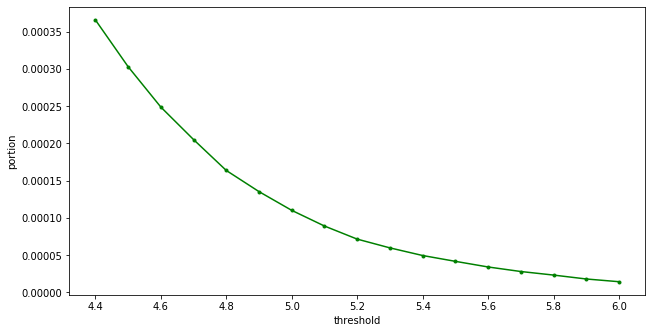

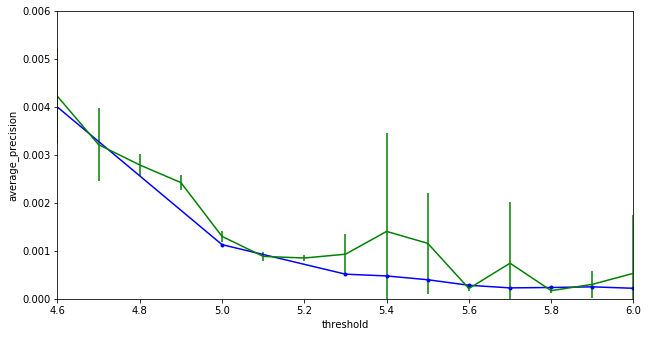

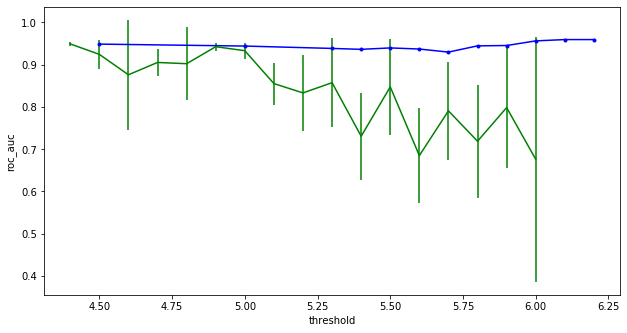

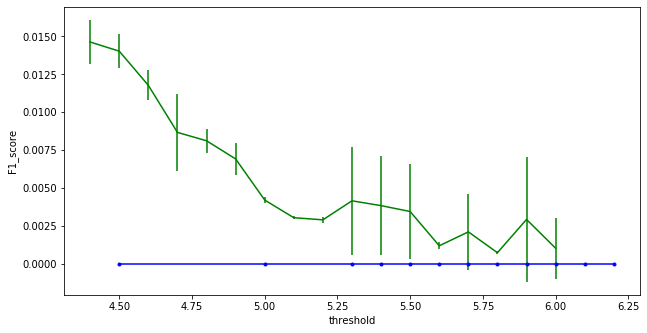

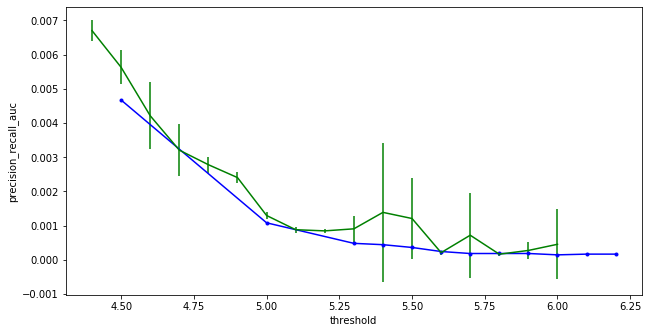

In [18]:
# plot 1 portion
fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(results["threshold"], results["portion"], color='green', marker='.')

axes.set_xlabel('threshold')
axes.set_ylabel('portion')

# plot 2 precision
fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.axis([4.6, 6.0, 0, 0.006])

# axes.plot(results["threshold"], results["avg_prec"     ], color='green', marker='.')

axes.errorbar(results["threshold"],
              results["avg_prec_mean"],
              yerr=results['avg_prec_std'],
              color='green')
axes.plot(baseline["threshold"], baseline["avg_prec_base"], color='blue' , marker='.')


axes.set_xlabel('threshold')
axes.set_ylabel('average_precision')

# plot 3 roc_auc
fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# axes.plot(results["threshold"], results["roc_auc"     ], color='green', marker='.')

axes.errorbar(results["threshold"],
              results["roc_auc_mean"],
              yerr=results['roc_auc_std'],
              color='green')

axes.plot(baseline["threshold"], baseline["roc_auc_base"], color='blue' , marker='.')

axes.set_xlabel('threshold')
axes.set_ylabel('roc_auc')

# plot 4 F1_score
fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# axes.plot(results["threshold"], results["F1 (0.5)"     ], color='green', marker='.')

axes.errorbar(results["threshold"],
              results["max_F1_mean"],
              yerr=results['max_F1_std'],
              color='green',
              label='both limits')

axes.plot(baseline["threshold"], baseline["F1 (0.5)_base"], color='blue' , marker='.')


axes.set_xlabel('threshold')
axes.set_ylabel('F1_score')

# plot 5 precision_recall auc
fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# axes.plot(results["threshold"], results["prec_rec_auc"     ], color='green', marker='.')

axes.errorbar(results["threshold"],
              results["prec_rec_auc_mean"],
              yerr=results['prec_rec_auc_std'],
              color='green',
              label='both limits')

axes.plot(baseline["threshold"], baseline["prec_rec_auc_base"], color='blue' , marker='.')


axes.set_xlabel('threshold')
axes.set_ylabel('precision_recall_auc')

# # plot 1 precision
# fig = plt.figure(figsize=(10, 6))

# axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# axes.plot(results["threshold"], results["avg_prec"], color='green', marker='.')

# axes.set_xlabel('threshold')
# axes.set_ylabel('average_precision')

